# Perceptron Classifier and Logistic Regression: Breast Cancer Classifier

## Project Overview

This project explores the implementation and evaluation of two foundational machine learning models: the Perceptron Classifier and Logistic Regression. The goal is to demonstrate the use of Python for building, training, and analyzing these models for binary classification tasks.

---

## Perceptron Classifier

### Introduction

The Perceptron Classifier is one of the simplest types of artificial neural networks, designed for binary classification tasks. The model works by learning a decision boundary to separate two classes in a dataset. The decision boundary can be represented as:

$$ Wx + b = 0 $$

Here:
- **W** is the weight vector.
- **b** is the bias term.

The classifier predicts labels based on the sign of the expression **Wx + b**, where the sign function is defined as:

$$ 
\text{sign}(x) = 
\begin{cases} 
1 & x > 0 \\
-1 & x \leq 0 
\end{cases} 
$$

---

## Model Fitting

The fitting process involves optimizing **W** and **b** using gradient descent. For a given dataset, the error function is defined as:

$$ \epsilon_{i} = \frac{1}{2}(y_{i} - sign(wx_{i}+b))^{2} =\frac{1}{2} (y_{i} - sign( \sum_{j} \{ w_{j}x_{ij}\}+b ))^{2} $$ 
,where j is the j-th feature.

---

## Gradient Descent Updates

In each epoch, we loop through the entire training dataset. For each sample, we make a prediction using our current **w** and **b**. We update our weights and bias only when the prediction is incorrect.

The gradient of our error function is used to update our weights and the bias. 
The gradient of $\epsilon_{i}$:
$$\frac{\partial \epsilon_{i}}{\partial w} =  \begin{cases} x_{i} & \text{predicted = 1 \& target = -1}  \\ -x_{i}  & \text{predicted = -1 \& target = 1} \end{cases}$$

$$\frac{\partial \epsilon_{i}}{\partial b} =  \begin{cases} y_{i} & \text{predicted = 1 \& target = -1 } \\ -y_{i} &  \text{predicted = -1 \& target = 1 }\end{cases}$$

Another way of writing it would be:
$$\frac{\partial \epsilon_{i}}{\partial w} =  -y_{i}\cdot x_{i} $$
$$\frac{\partial \epsilon_{i}}{\partial b} =  -y_{i}  $$
For each incorrectly predicted sample, we update **w** and **b** :
$$ w = w - \alpha  \frac{\partial \epsilon_{i}}{\partial w} $$ 
$$ b = b - \alpha  \frac{\partial \epsilon_{i}}{\partial b} $$
,where **$\alpha$** is the learning rate. 

Notice that since the derivative is negative, this means we will be adding either $y_{i}\cdot x_{i}$ or $y_{i}$ * (learning rate) .

---

## Analysis and Insights

### Training and Testing
- During training, the model iteratively updates its weights and bias using the gradient of the error function.
- The training process is repeated for a fixed number of epochs or until convergence.

### Learning Rate Impact
- Higher learning rates can speed up convergence but may cause instability.
- Lower learning rates result in slower convergence but can achieve higher precision.

### Epoch Settings
- Setting too few epochs results in underfitting and low accuracy.
- Too many epochs can lead to overfitting or plateauing performance.

---

This documentation serves as a guide to the implementation and evaluation of a Perceptron Classifier for binary classification tasks. It highlights the key mathematical concepts, implementation details, and insights from training and testing.


## Imports for this project

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sklearn.linear_model

%matplotlib inline

## Perceptron Class Implementation

This Python implementation defines a Perceptron Classifier for binary classification tasks. Below is an explanation of the class, its methods, and their purposes.

### Class: `perceptron`
The `perceptron` class encapsulates the following:

1. **Attributes:**
   - `self.w`: Weight vector initialized randomly between -1 and 1, with dimensions matching the input features.
   - `self.b`: Bias term initialized randomly between -1 and 1.
   - `self.x_train`: Training dataset.
   - `self.y_train`: Training labels.
   - `self.x_test`: Test dataset.
   - `self.y_test`: Test labels.
   - `self.learning_rate`: Learning rate **$\alpha$** controls gradient descent step size.
   - `self.epochs`: Number of training iterations over the dataset.
   - `self.train_accuracies`: List to store training accuracy after each epoch.
   - `self.test_accuracies`: List to store testing accuracy after each epoch.

---

### Methods

1. **`__init__(self, x, y, x_test, y_test, learning_rate, epochs)`**
   - Initializes the perceptron with input data, labels, learning rate, and number of epochs.
   - Randomly assigns initial values to the weight vector and bias term.

2. **`sign(self, x)`**
   - Implements the sign function:
     - Returns 1 if  x > 0.
     - Returns -1 if x $\leq$ 0.
   - This function is used for making predictions.

3. **`predict(self, x)`**
   - Predicts labels for an input dataset **x**.
   - Computes $ sign((x_i \cdot w) + b) $ for each input sample $x_{i}$.

4. **`accuracy(self, x, y)`**
   - Calculates the accuracy of the model on a dataset **x**  with corresponding true labels **y**.
   - Compares predicted labels to true labels and returns the mean accuracy.

5. **`train(self)`**
   - Implements the perceptron training loop using gradient descent:
     - For each sample in the training data, computes a prediction.
     - Updates the weight vector **w** and bias **b** if the prediction is incorrect:
       - $ w = w + \alpha \cdot y_i \cdot x_i $
       - $ b = b + \alpha \cdot y_i $
   - After each epoch, calculates and records both training and testing accuracies.

---

### Key Features
- **Training Mechanism:** Updates the model parameters **w** and **b** only for incorrectly classified samples, ensuring efficient training.
- **Accuracy Tracking:** Maintains a record of training and testing accuracies for each epoch, useful for analysis and visualization.
- **Custom Prediction:** Uses the sign function to determine class labels for input samples.

This implementation provides a clear and concise framework for training and evaluating a Perceptron Classifier.

In [2]:
class perceptron:
    def __init__(self, x, y, x_test, y_test, learning_rate, epochs):
        self.w = np.random.uniform(-1, 1, x.shape[1])
        self.b = np.random.uniform(-1, 1)
        self.x_train = x
        self.y_train = y
        self.x_test = x_test
        self.y_test = y_test
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.train_accuracies = []
        self.test_accuracies = []

    def sign(self, x):
        if x > 0:
            return 1
        elif x < 0:
            return -1
        return 0

    def predict(self, x):
        return np.array([self.sign(np.dot(xi, self.w) + self.b) for xi in x])
    
    def accuracy(self, x, y):
        y_pred = self.predict(x)
        return np.mean(y == y_pred)

    def train(self):
        for _ in range(self.epochs):
            for xi, yi in zip(self.x_train, self.y_train):
                prediction = self.sign(np.dot(xi, self.w) + self.b)
                
                #update only when incorrect
                if prediction != yi:
                    self.w += self.learning_rate * yi * xi
                    self.b += self.learning_rate * yi

            # After each epoch, we save the train and test accuracy into their respective lists
            self.train_accuracies.append(self.accuracy(self.x_train, self.y_train))
            self.test_accuracies.append(self.accuracy(self.x_test, self.y_test))

## UCI ML Breast Cancer Wisconsin (Diagnostic) Dataset
Let's look into our dataset and see the attributes of each sample. Let's also take a look at the head of the data.

In [3]:
breast_cancer = sklearn.datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
print("The shape of our data:", data.shape)
data.head()

The shape of our data: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Normalizing the dataset
We will be normalizing our X dataset before classifying it so we can improve the accuracy of our Perceptron model. We will be using this equation to normalize:

$$ x_{ij}^{normalized} = \frac{x_{ij} -\mu_{j}}{\sigma_{j}} $$
Where $x_{ij}$ is the value of feature **j** of sample **i**, 

$\mu_{j} $ and $\sigma_{j}$ are the mean and the standard deviation of feature **j**.

In [4]:
data['class'] = breast_cancer.target
X = data.drop('class', axis = 1)
Y = data['class']

X = X.to_numpy(dtype = float)
Y = Y.to_numpy(dtype = float)

# Training our model
def normalize(v):
    for j in range(v.shape[1]):  # Loop over each feature
        mean_j = np.mean(v[:, j])
        std_j = np.std(v[:, j])
        v[:, j] = (v[:, j] - mean_j) / std_j
    return v

# Normalizing the dataset X
X_normalized = normalize(X)

# Converting values from Y to -1 and 1
for i in range(Y.shape[0]):
    if Y[i] == 0:
        Y[i] = -1

# Splitting the data to get test data
x_train, x_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=123)

## Exploring our Perceptron's Performance and Learning Dynamics
This script demonstrates the training and evaluation of our Perceptron model for binary classification. The model is trained using a specified learning rate and number of epochs, and its accuracy is assessed on both training and test datasets. The code also visualizes the progression of accuracy over epochs for both datasets.

### Code Functionality:
1. **Training the Perceptron**: The `perceptron` object is initialized and trained using the `train` method.
2. **Evaluating Accuracy**: The accuracy of the model on the test dataset is calculated and printed.
3. **Visualization**: A graph is plotted to illustrate the training and test accuracy across epochs.


Accuracy Score: 0.9824561403508771


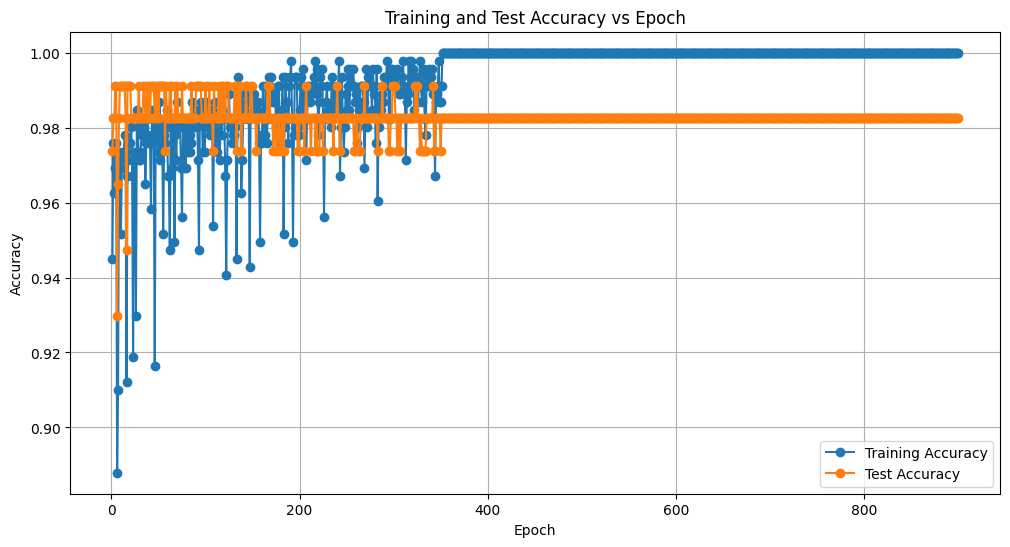

In [5]:
# Train and predict.
myPer = perceptron(x_train, y_train, x_test, y_test, learning_rate=1E-1, epochs=900)
myPer.train()

# Test and print the accuracy score.
print(f"Accuracy Score: {myPer.accuracy(x_test, y_test)}")

# Plot the graph.
epochs = list(range(1, myPer.epochs + 1))

# Plot training accuracy.
plt.figure(figsize=(12, 6))
plt.plot(epochs, myPer.train_accuracies, label='Training Accuracy', marker='o')

# Plot test accuracy.
plt.plot(epochs, myPer.test_accuracies, label='Test Accuracy', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs Epoch')
plt.legend()
plt.grid(True)

# Show the plot.
plt.show()


## Training and Testing the Perceptron model from sklearn
This code snippet uses the `Perceptron` class from sklearn to train a binary classification model. The model is trained on a provided training dataset and evaluated on a test dataset.

### Code Functionality:
1. **Model Training**: The Scikit-learn Perceptron is initialized with a tolerance and random state, and then trained using the `fit` method.
2. **Prediction**: The trained model predicts labels for the test dataset.
3. **Accuracy Evaluation**: The accuracy of the predictions is computed using the `accuracy_score` function and printed.


In [6]:
# Train and print out test accruacy score. 
skPer = Perceptron(tol=0.03, random_state=0)
skPer.fit(x_train, y_train)
y_pred = skPer.predict(x_test)

print(f"Sklearn accuracy score: {accuracy_score(y_pred, y_test)}")

Sklearn accuracy score: 0.9912280701754386


## Training our Perceptron model using another dataset
We will be using a 2-dimensional toy dataset. This will make it easier to visualize it's decision boundary. Below is the scatterplot of the dataset we will be classifying. 

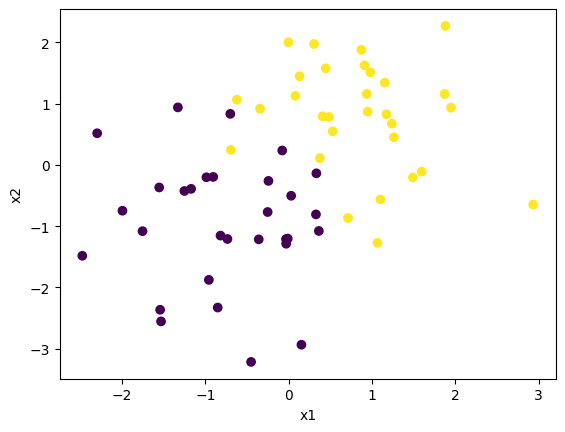

In [7]:
SIZE = 30
np.random.seed(seed=1)
toy_data_0 = np.random.multivariate_normal([-0.75, -0.75], cov=np.array([[1, 0.1],
                                                                         [0.1, 1]]), size=SIZE)
toy_data_1 = np.random.multivariate_normal([0.75, 0.75], cov=np.array([[1, 0],
                                                                       [0, 1]]), size=SIZE)
toy_data = np.vstack((toy_data_0, toy_data_1))
toy_labels = np.hstack((np.ones(SIZE)*-1, np.ones(SIZE)))
plt.scatter(toy_data[:, 0], toy_data[:, 1], c=toy_labels)
plt.xlabel('x1')
plt.ylabel('x2')
X_train, X_test, Y_train, Y_test = train_test_split(toy_data, toy_labels, test_size = 0.3, stratify= toy_labels, random_state = 123)

## Looking at the Weights and Bias prior to Training
This code snippet extracts and displays the weights (`w`) and bias (`b`) of our trained Perceptron model. These parameters are critical as they define the decision boundary learned by the model during training. We are also looking at what happens when we change the learning rate to from 1E-1 to 1E-4.

### Importance:
1. **Weights (`w`)**: Represent the influence of each feature on the decision-making process of the model. Larger weights indicate stronger feature importance.
2. **Bias (`b`)**: Adjusts the decision boundary's position relative to the data, enabling flexibility in classification.

Understanding these parameters helps in interpreting the model's behavior and provides insights into how the features contribute to the predictions.

In [8]:
our_clf= perceptron(X_train, Y_train,X_test,Y_test, learning_rate= 1E-4, epochs=1000)
w = our_clf.w
b = our_clf.b

print(w)
print(b) 

[-0.68641721 -0.9628476 ]
-0.8599557125615553


## Let's visualize our initial decision boundary
This code visualizes the training data and the decision boundary of our trained Perceptron model.

### Description:
1. **Scatter Plot**: The training data points are plotted with colors indicating their class labels.
2. **Decision Boundary**: The decision boundary, calculated using our model's weights (`w`) and bias (`b`), is plotted to show how the model separates the classes.
3. **Axes Labels**: The x-axis and y-axis represent the two features of the dataset.


Text(0, 0.5, 'x2')

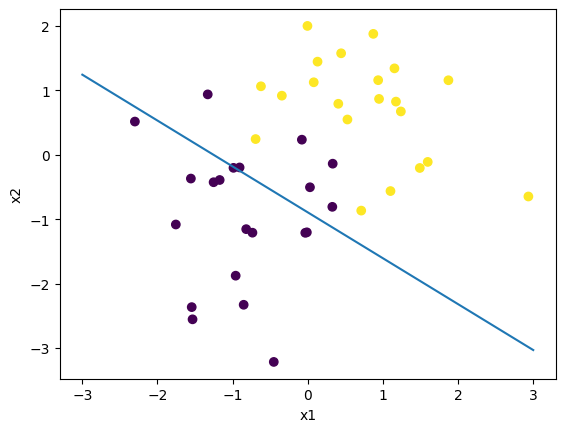

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
x= np.linspace(-3,3, 100)
x2= -(w[0]/w[1])*x - b/w[1]
plt.plot(x, x2)
plt.xlabel('x1')
plt.ylabel('x2')

## Training our Perceptron Classifier
After training the model, we will plot the decision boundary of the trained perceptron. 

Text(0, 0.5, 'x2')

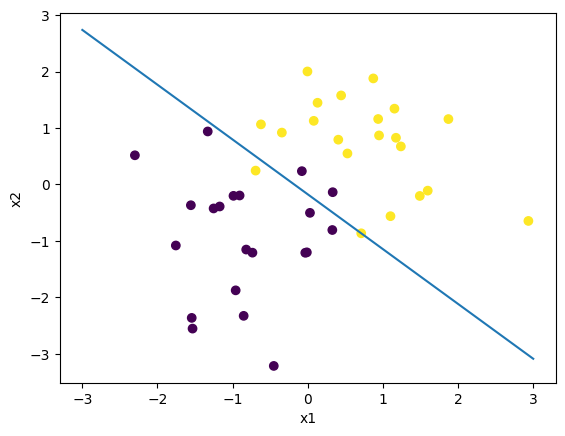

In [10]:
myNewPer = perceptron(X_train, Y_train, X_test, Y_test, learning_rate=1E-4, epochs=1000)
myNewPer.train()
w = myNewPer.w
b = myNewPer.b

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
x= np.linspace(-3,3, 100)
x2= -(w[0]/w[1])*x - b/w[1]
plt.plot(x, x2)
plt.xlabel('x1')
plt.ylabel('x2')

## Exploring Logistic Regression in scikit-learn for Predictive Modeling

A logistic regression model is a statistical method used for binary classification tasks. It predicts the probability that a given input belongs to a particular class, using a sigmoid function to map linear combinations of input features to values between 0 and 1. This makes it suitable for problems where outputs are binary labels (e.g., yes/no, 0/1).

### Importance:
1. **Interpretability**: Logistic regression is simple and interpretable, making it a foundational tool in classification tasks.
2. **Probability Outputs**: Unlike the Perceptron model, it provides probabilistic predictions, enabling more nuanced decision-making.
3. **Performance on Linearly Separable Data**: It excels in scenarios where the data is linearly separable, similar to the Perceptron.

### Relation to the Perceptron Model:
Logistic regression and the Perceptron share the concept of a linear decision boundary. However, while the Perceptron makes hard classification decisions, logistic regression uses a probabilistic approach, which often leads to better performance on noisy or overlapping datasets.


In [11]:
breast_cancer = sklearn.datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data['class'] = breast_cancer.target
X = data.drop('class', axis = 1)
Y = data['class']

X = X.to_numpy(dtype = float)
Y = Y.to_numpy(dtype = float)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify= Y, random_state = 123)

# Train your model
logisticSkl = sklearn.linear_model.LogisticRegression()
X_norm = normalize(X_train)
logisticSkl.fit(X_norm, Y_train)

# Print the accuracy score
xTestNorm = normalize(X_test)
y_pred = logisticSkl.predict(xTestNorm)
print(accuracy_score(y_pred, Y_test))

0.9707602339181286


## Training the Logistic Regression Model on the Toy Dataset
We will be showing the weights and the bias after training. We will also plot the decision boundary. 

Weights: [[1.68040823 1.68551658]]
Bias: [-0.15168822]


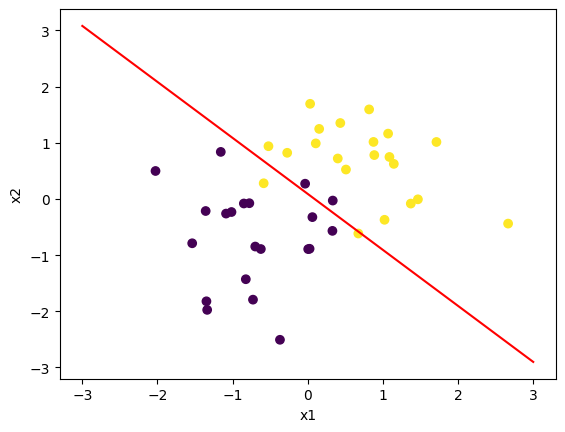

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(toy_data, toy_labels, test_size = 0.3, stratify= toy_labels, random_state = 123)

myLogisticSkl = sklearn.linear_model.LogisticRegression()
xTrainNorm = normalize(X_train)
xTestNorm = normalize(X_test)

myLogisticSkl.fit(xTrainNorm, Y_train)

# Printing out the weights and the bias. 
w = myLogisticSkl.coef_
b = myLogisticSkl.intercept_

print(f"Weights: {w}")
print(f"Bias: {b}")

# Plotting the decision boundary
plt.scatter(xTrainNorm[:, 0], xTrainNorm[:, 1], c=Y_train)
x2 = -(w[0][0] / w[0][1]) * x - b / w[0][1]
plt.plot(x, x2, color='red')

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Conclusion

In this project, we explored the implementation and evaluation of two fundamental machine learning models: the Perceptron Classifier and Logistic Regression, applied to the task of binary classification on the Breast Cancer dataset.

### Key Insights and Findings

#### Perceptron Classifier
The Perceptron Classifier, a simple yet effective binary classifier, was implemented using gradient descent to optimize the weight vector and bias. We highlighted the following aspects:
- **Training Process**: The model iteratively updated its weights and bias using the gradient of the error function, and adjustments were only made when predictions were incorrect.
- **Learning Rate and Epochs**: The learning rate significantly impacted the convergence rate of the model. Higher learning rates sped up convergence but led to instability, while lower learning rates resulted in slower but more stable convergence. The number of epochs also played a crucial role in determining model accuracy, with too few epochs leading to underfitting and too many epochs causing overfitting.
- **Performance**: After training, our Perceptron Classifier achieved an accuracy of approximately 98.25% on the test set, indicating strong performance on the Breast Cancer dataset.

#### Logistic Regression
Logistic Regression, another foundational model for binary classification, was briefly compared to the Perceptron. Logistic Regression provides probabilistic outputs, unlike the Perceptron, which makes hard decisions. This characteristic makes Logistic Regression particularly useful when the classification task requires not just a binary outcome, but also a measure of uncertainty.
- **Probabilistic Output**: The Logistic Regression model offers probabilities that a given sample belongs to a class, making it a more nuanced decision tool.
- **Performance Comparison**: Logistic Regression tends to perform better than the Perceptron when handling noisy or overlapping data due to its smooth, probabilistic decision boundary.

#### Model Evaluation
Both models were evaluated using the Breast Cancer dataset, and their performance was assessed on both training and test data. The Perceptron Classifier, with proper hyperparameter tuning, showed impressive results. However, Logistic Regression's probabilistic nature provided a more robust solution for classification tasks that may involve uncertainty.

#### Final Thoughts
This project successfully demonstrated the Perceptron Classifier and Logistic Regression, two essential machine learning algorithms for binary classification tasks. The Perceptron, with its simplicity and efficiency, is well-suited for linearly separable data, while Logistic Regression's probabilistic nature provides better performance on noisy or complex datasets. Both models are foundational in the field of machine learning and provide a strong basis for understanding more advanced techniques.

Future improvements could involve exploring regularization techniques, tuning the models further, or applying them to more complex datasets to evaluate their scalability and robustness.
